In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num, axis=-1, keepdims=True)
    return num / den

In [54]:
def norm(x, axis=-1):
    return np.sum(x ** 2, axis=axis)

In [43]:
logits_range = np.linspace(-3, 3, 100)
xv, yv = np.meshgrid(logits_range, logits_range)
logits_stacked = np.stack([xv, yv], axis=2)
proba = softmax(logits_stacked)[..., 1]

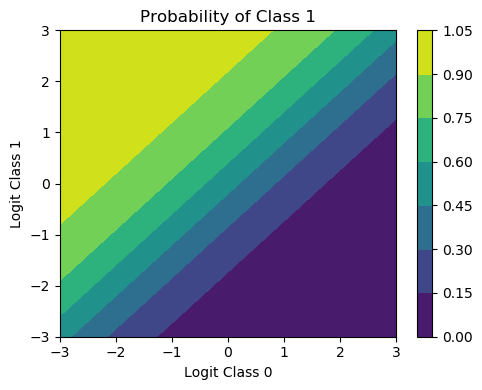

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=100)
cntr = ax.contourf(xv, yv, proba)
ax.set_title("Probability of Class 1")
ax.set_xlabel("Logit Class 0")
ax.set_ylabel("Logit Class 1")
fig.colorbar(cntr, ax=ax)
plt.tight_layout()
plt.show()

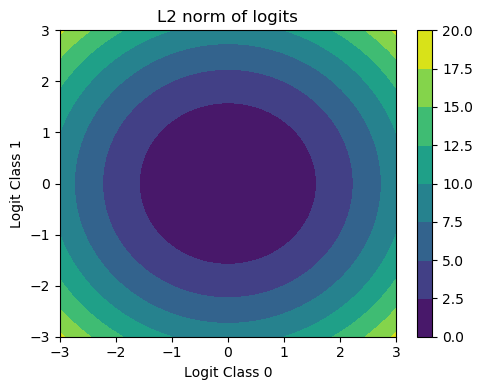

In [55]:
l2_norm = norm(logits_stacked)

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=100)
cntr = ax.contourf(xv, yv, l2_norm)
ax.set_title("L2 norm of logits")
ax.set_xlabel("Logit Class 0")
ax.set_ylabel("Logit Class 1")
fig.colorbar(cntr, ax=ax)
plt.tight_layout()
plt.show()

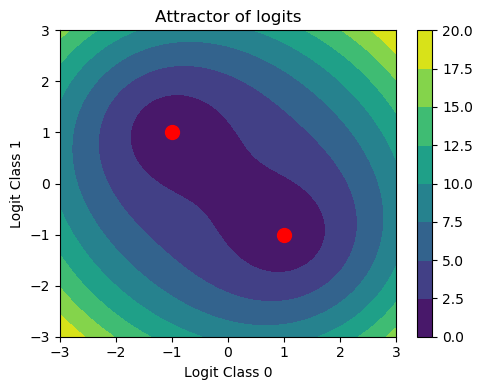

In [61]:
desired_points = np.array([[-1, 1], [1, -1]])
attractors = []
for point in desired_points:
    tmp_val = norm(logits_stacked - point)
    attractors.append(tmp_val)
attractor = np.sqrt(np.prod(np.stack(attractors, axis=2), axis=2))

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=100)
cntr = ax.contourf(xv, yv, attractor)
ax.set_title("Attractor of logits")
ax.set_xlabel("Logit Class 0")
ax.set_ylabel("Logit Class 1")
fig.colorbar(cntr, ax=ax)
for point in desired_points:
    ax.plot(point[0], point[1], color="r", marker='o', markersize=10)
plt.tight_layout()
plt.show()

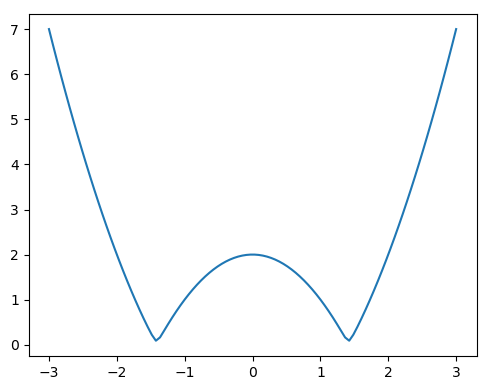

In [68]:
def rotation_matrix(angle):
    matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    return matrix


matrix = rotation_matrix(np.pi/4)
logits_rotated = np.dot(logits_stacked, matrix)
attractors = []
for point in desired_points:
    tmp_val = norm(logits_rotated - point)
    attractors.append(tmp_val)
attractor = np.sqrt(np.prod(np.stack(attractors, axis=2), axis=2))

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=100)
ax.plot(logits_range,attractor[50])
plt.tight_layout()
plt.show()

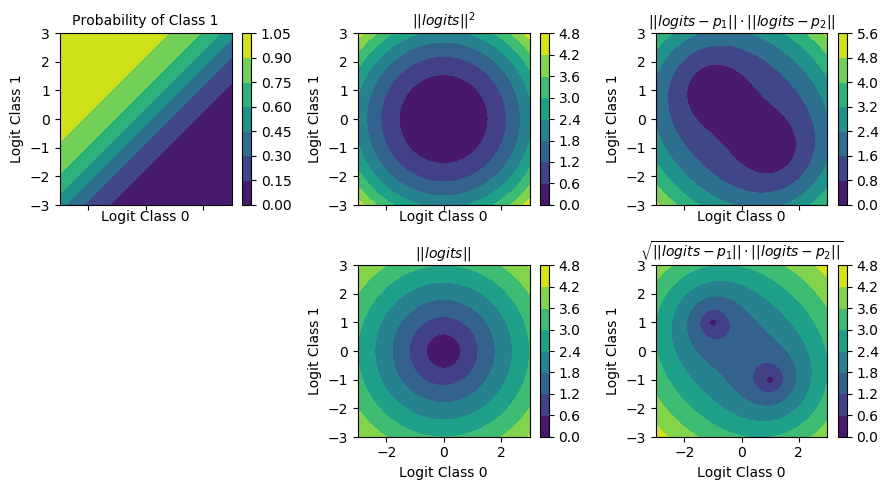

In [97]:
# Together
factor = 4


fig, axes = plt.subplots(2, 3, figsize=(9, 5), dpi=100, sharex=True)

ax = axes[0, 0]
cntr = ax.contourf(xv, yv, proba)
ax.set_title("Probability of Class 1", fontsize=10)
ax.set_xlabel("Logit Class 0")
ax.set_ylabel("Logit Class 1")
ax.set_aspect('equal')
fig.colorbar(cntr, ax=ax)

ax = axes[0, 1]
l2_norm = norm(logits_stacked) / factor
cntr = ax.contourf(xv, yv, l2_norm)
ax.set_title(r"$||logits||^2$", fontsize=10)
ax.set_xlabel("Logit Class 0")
ax.set_aspect('equal')
ax.set_ylabel("Logit Class 1")
fig.colorbar(cntr, ax=ax)

desired_points = np.array([[-1, 1], [1, -1]])
attractors = []
for point in desired_points:
    tmp_val = norm(logits_stacked - point)
    attractors.append(tmp_val)
attractor = np.sqrt(np.prod(np.stack(attractors, axis=2), axis=2)) / factor

ax = axes[0, 2]
cntr = ax.contourf(xv, yv, attractor)
ax.set_title(r"$||logits-p_1||\cdot||logits-p_2||$", fontsize=10)
ax.set_xlabel("Logit Class 0")
ax.set_aspect('equal')
ax.set_ylabel("Logit Class 1")
fig.colorbar(cntr, ax=ax)
#for point in desired_points:
#    ax.plot(point[0], point[1], color="r", marker='o', markersize=10)
    
ax = axes[1, 1]
l2_norm = norm(logits_stacked)
cntr = ax.contourf(xv, yv, np.sqrt(l2_norm))
ax.set_title(r"$||logits||$", fontsize=10)
ax.set_xlabel("Logit Class 0")
ax.set_aspect('equal')
ax.set_ylabel("Logit Class 1")
fig.colorbar(cntr, ax=ax)

desired_points = np.array([[-1, 1], [1, -1]])
attractors = []
for point in desired_points:
    tmp_val = norm(logits_stacked - point)
    attractors.append(tmp_val)
attractor = np.sqrt(np.prod(np.stack(attractors, axis=2), axis=2))

ax = axes[1, 2]
cntr = ax.contourf(xv, yv, np.sqrt(attractor))
ax.set_title(r"$\sqrt{||logits-p_1||\cdot||logits-p_2||}$", fontsize=10)
ax.set_xlabel("Logit Class 0")
ax.set_aspect('equal')
ax.set_ylabel("Logit Class 1")
fig.colorbar(cntr, ax=ax)
#for point in desired_points:
#    ax.plot(point[0], point[1], color="r", marker='o', markersize=5)
    
axes[1, 0].axis('off')
    
plt.tight_layout()
plt.show()